# EDA, 전처리(Tree 알고리즘용, Tree에서 점수가 잘나와서 전처리+파라미터 튜닝 시도)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tqdm import tqdm

In [2]:
train = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\train.csv')
test = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\test.csv')

In [3]:
# train_x = train.drop('Income', axis=1)
# train_y = train['Income']

## 데이터 살펴보기

In [4]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [5]:
test.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


In [6]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [7]:
train.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

결측치: 없음

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

아래는 minuwoo님의 코드공유에서 인용
>ID : 고객의 지정 넘버로 별다른 정보가 없기 때문에 분석에 사용하지 않을 것임  
Age : 고객의 나이, 연속형 변수  
Gender : 성별, 이산형 변수  
Education_Status : 최종학력을 의미한다. 이산형 변수  
Employment_Status : 취업 상태를 의미한다. 이산형 변수  
Working_Week (Yearly) : 주당 일하는 시간으로 해석된다. 연속형변수 or 범주를 잡아 이산형으로 파악 가능  
Industry_Status : 산업분야, 이산형 변수  
Occupation_Status : 직업 분야, 이산형 변수  
Race : 인종, 이산형변수  
Hispanic_Origin : 히스패닉 출신, 이산형 변수  
Martial_Status : 결혼 여부, 이산형 변수  
Household_Status : 가족 구성, 이산형 변수  
Household_Summary : 가족 구성 요약, 이산형 변수  
Citizenship : 시민권, 이산형 변수  
Birth_Country : 국적, 이산형변수  
Birth_Country (Father) : 아버지의 국적, 이산형변수  
Birth_Country (Mother) : 어머니의 국적, 이산형변수  
Tax_Status : 세금 여부, 이산형변수  
Gains : 이득또는 매출로 보인다, 연속형 변수  
Losses : 지출로 보인다, 연속형 변수  
Dividends : 배당금, 연속형 변수  
Income_Status : 소득 상태, 이산형변수  
Income : 소득, 연속형 변수  

범주형 데이터와 선형 데이터 구분해서 리스트로 만들기

In [9]:
categorical_features = [col for col in train.columns if train[col].dtype == 'object']
numerical_features = [col for col in train.columns if train[col].dtype == 'int64']

In [10]:
categorical_features

['ID',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Income_Status']

In [11]:
numerical_features

['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']

In [12]:
train_copy = train.copy()

In [13]:
# test_copy = test.copy()

<Axes: >

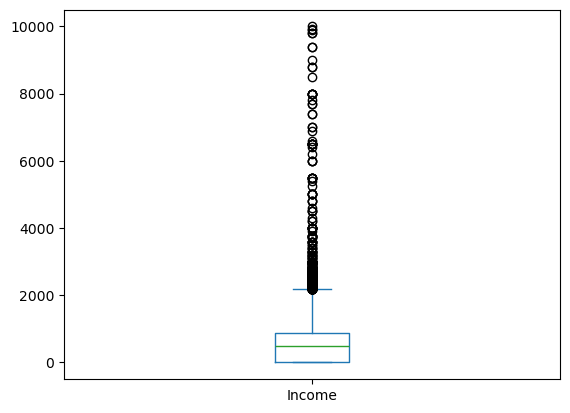

In [14]:
train_copy['Income'].plot(kind='box')

박스를 벗어난 수치가 상당히 많고, 그 간격이 좁다. 어떤게 진짜 이상치인지 판단할 수 없다. 각 피쳐별로 표준편차가 너무 높게 나오는 범주에서 이상치를 찾아보고 제거하는 식으로 해야겠다.

## 범주형 데이터를 수치 데이터로 인코딩하기

In [15]:
categorical_features

['ID',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Income_Status']

### ID

ID는 제거한다

In [16]:
train_copy = train_copy.drop('ID', axis=1)

In [17]:
test = test.drop('ID', axis=1)

### Gender

M과 F의 Income 평균이 유의미한 차이를 보이므로 M은 1, F는 0으로 처리한다

In [18]:
train_copy['Gender'].replace({'M':1,'F':0}, inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_14476\3551207921.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['Gender'].replace({'M':1,'F':0}, inplace=True)
C:\Users\82102\AppData\Local\Temp\ipykernel_14476\3551207921.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy['Gend

In [19]:
test['Gender'].replace({'M':1,'F':0}, inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_14476\2024148450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Gender'].replace({'M':1,'F':0}, inplace=True)
C:\Users\82102\AppData\Local\Temp\ipykernel_14476\2024148450.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Gender'].replace

### Education_Status

In [20]:
train_copy['Education_Status'].unique()

array(['Middle (7-8)', 'Associates degree (Vocational)', 'High graduate',
       'Masters degree', 'Bachelors degree', 'High Freshman',
       'Elementary (1-4)', 'College', 'Children', 'High Sophomore',
       'Associates degree (Academic)', 'High Junior', 'Elementary (5-6)',
       'Doctorate degree', 'Professional degree', 'High Senior',
       'Kindergarten'], dtype=object)

각 교육수준 별 소득의 박스플롯을 보자

In [21]:
Education_Status_list = list(train_copy['Education_Status'].unique())

In [22]:
len(Education_Status_list)

17

<Axes: >

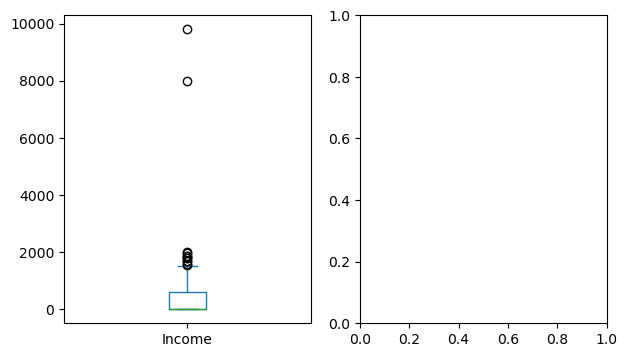

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
train_copy[train_copy['Education_Status'] == 'Middle (7-8)']['Income'].plot(kind = 'box', ax = axes[0])

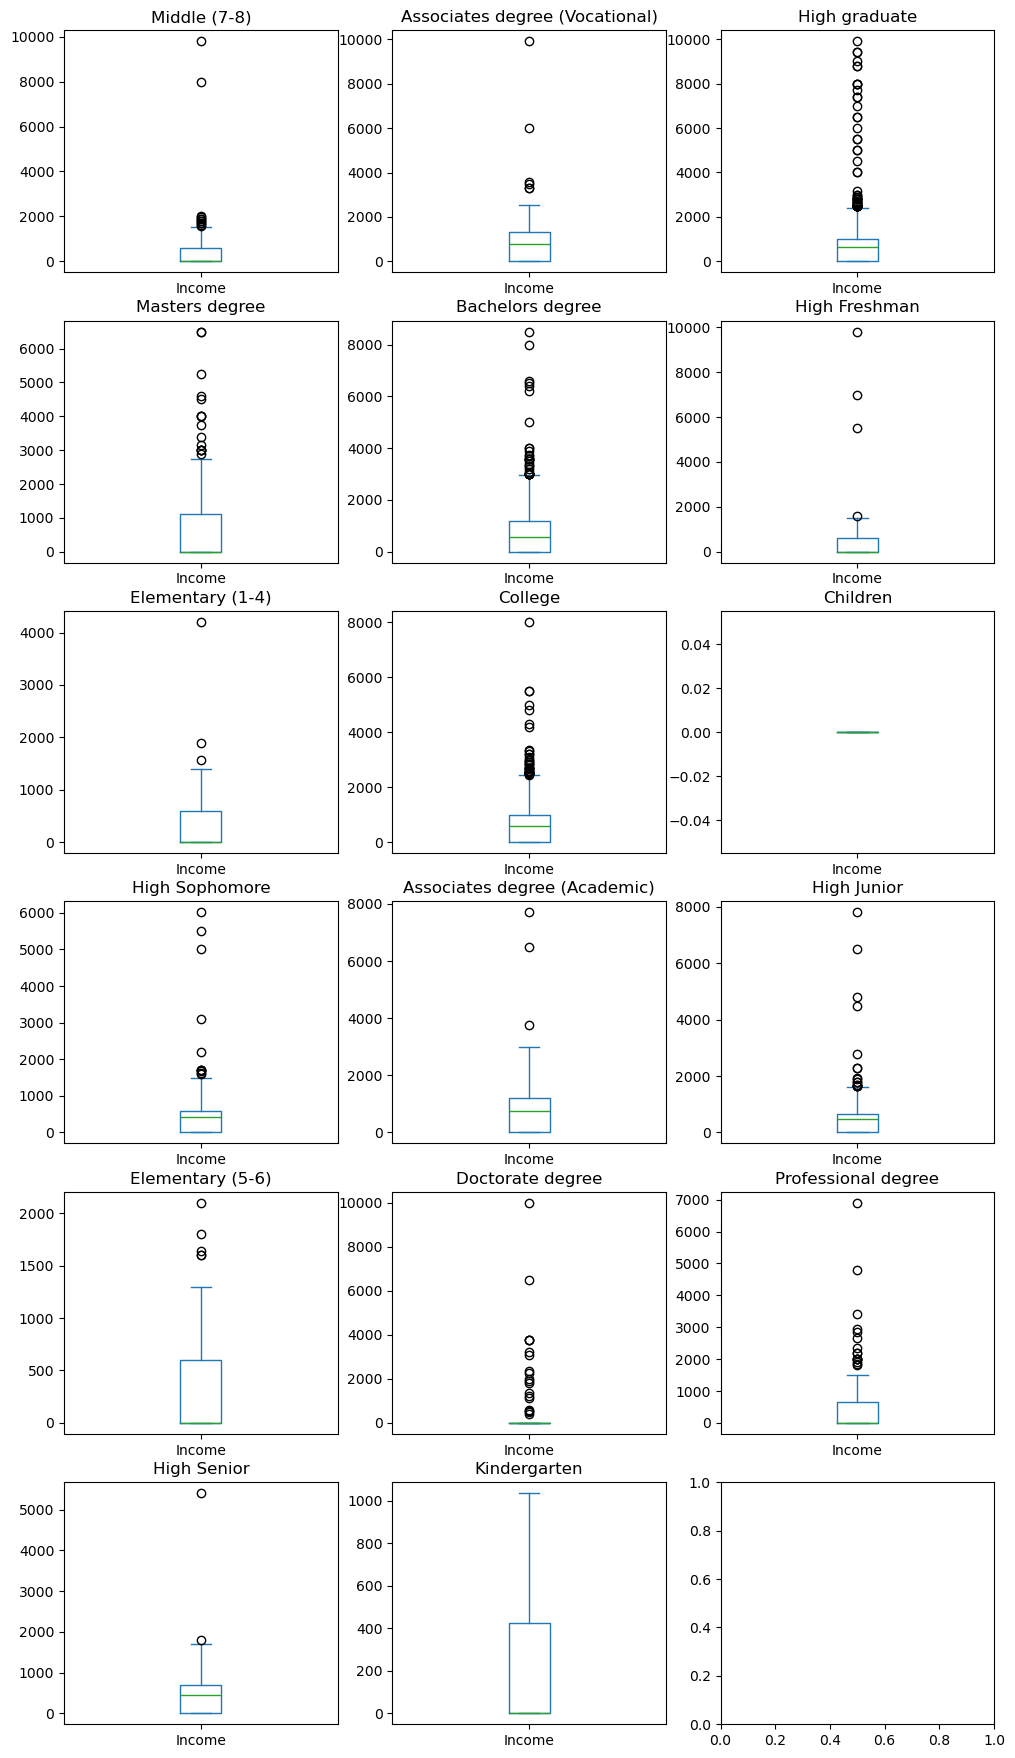

In [24]:
fig, axes = plt.subplots(6, 3, figsize=(12, 22))
axe = axes.ravel() # subplot이 2차원일 땐 axes를 unpack해줘야 함. 얘가 하나의 2차원 subplot을 만드는게 아니라 여러개의 1차원 subplot을 만들기 때문.

for i in range(len(Education_Status_list)):
    Education_Status = Education_Status_list[i]
    train_copy[train_copy['Education_Status'] == Education_Status]['Income'].plot(kind = 'box', ax = axe[i])
    axe[i].set_title(Education_Status)

In [25]:
train_copy['Education_Status'].value_counts()

Education_Status
High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: count, dtype: int64

모든 이상치를 제거해주자. 각 값별 이상치 제거 cut-off value는 다음과같이 정했다.

In [26]:
for Education_Status in Education_Status_list:
    print('\n'+Education_Status)
    print(train_copy[train_copy['Education_Status'] == Education_Status]['Income'].sort_values().tail(10))


Middle (7-8)
9536     1700
16920    1700
352      1800
3642     1800
19274    1864
4119     1882
10727    1976
11291    2000
14222    8000
467      9800
Name: Income, dtype: int64

Associates degree (Vocational)
5891     2500
18534    2500
13940    2500
16865    2532
5060     3300
10331    3300
14547    3500
13460    3581
9975     6000
4951     9916
Name: Income, dtype: int64

High graduate
1963     7700
10948    8000
3539     8000
4943     8000
8641     8800
341      8800
2154     9000
18492    9400
19030    9400
9869     9900
Name: Income, dtype: int64

Masters degree
13160    3400
4632     3750
9332     4000
12439    4000
7493     4000
16982    4500
4397     4600
3673     5250
2438     6500
10131    6500
Name: Income, dtype: int64

Bachelors degree
3993     3900
19795    4000
18759    4000
6755     5000
18558    6200
15996    6410
10685    6500
8309     6600
7875     8000
8081     8500
Name: Income, dtype: int64

High Freshman
3998     1400
7737     1400
19299    1425
16141    1450

In [27]:
cut_off_value_diction = {'Middle (7-8)': 2001,  
                         'Associates degree (Vocational)': 4000, 
                         'High graduate': 35000, 
                         'Masters degree': 4001, 
                         'Bachelors degree': 4001, 
                         'High Freshman': 2000, 
                         'Elementary (1-4)': 1500, 
                         'College': 3500, 
                         'Children': 1, 
                         'High Sophomore': 2000, 
                         'Associates degree (Academic)': 3001, 
                         'High Junior': 2500, 
                         'Elementary (5-6)': 1301, 
                         'Doctorate degree': 4000, 
                         'Professional degree': 3500, 
                         'High Senior': 2000, 
                         'Kindergarten': 1100}

In [28]:
del_ind_list = []
for Education_Status in Education_Status_list:
    for i in range(len(train_copy)):
        if train_copy['Education_Status'][i] == Education_Status:
            income = train_copy['Income'][i]
            if income >= cut_off_value_diction[Education_Status]:
                del_ind_list.append(i)

In [29]:
del_ind_list

[467,
 14222,
 4951,
 9975,
 2438,
 3673,
 4397,
 10131,
 16982,
 6755,
 7875,
 8081,
 8309,
 10685,
 15996,
 18558,
 992,
 1148,
 12980,
 5803,
 5887,
 11806,
 5785,
 11137,
 13172,
 15164,
 15583,
 18742,
 19453,
 2356,
 6911,
 11063,
 12367,
 12808,
 4250,
 16535,
 19365,
 3730,
 4471,
 5038,
 12424,
 19035,
 667,
 15088,
 15204,
 15522,
 18654,
 2008,
 18405,
 6940,
 16053,
 13507]

In [30]:
for ind in del_ind_list:
    train_copy.drop([ind], axis=0, inplace=True)

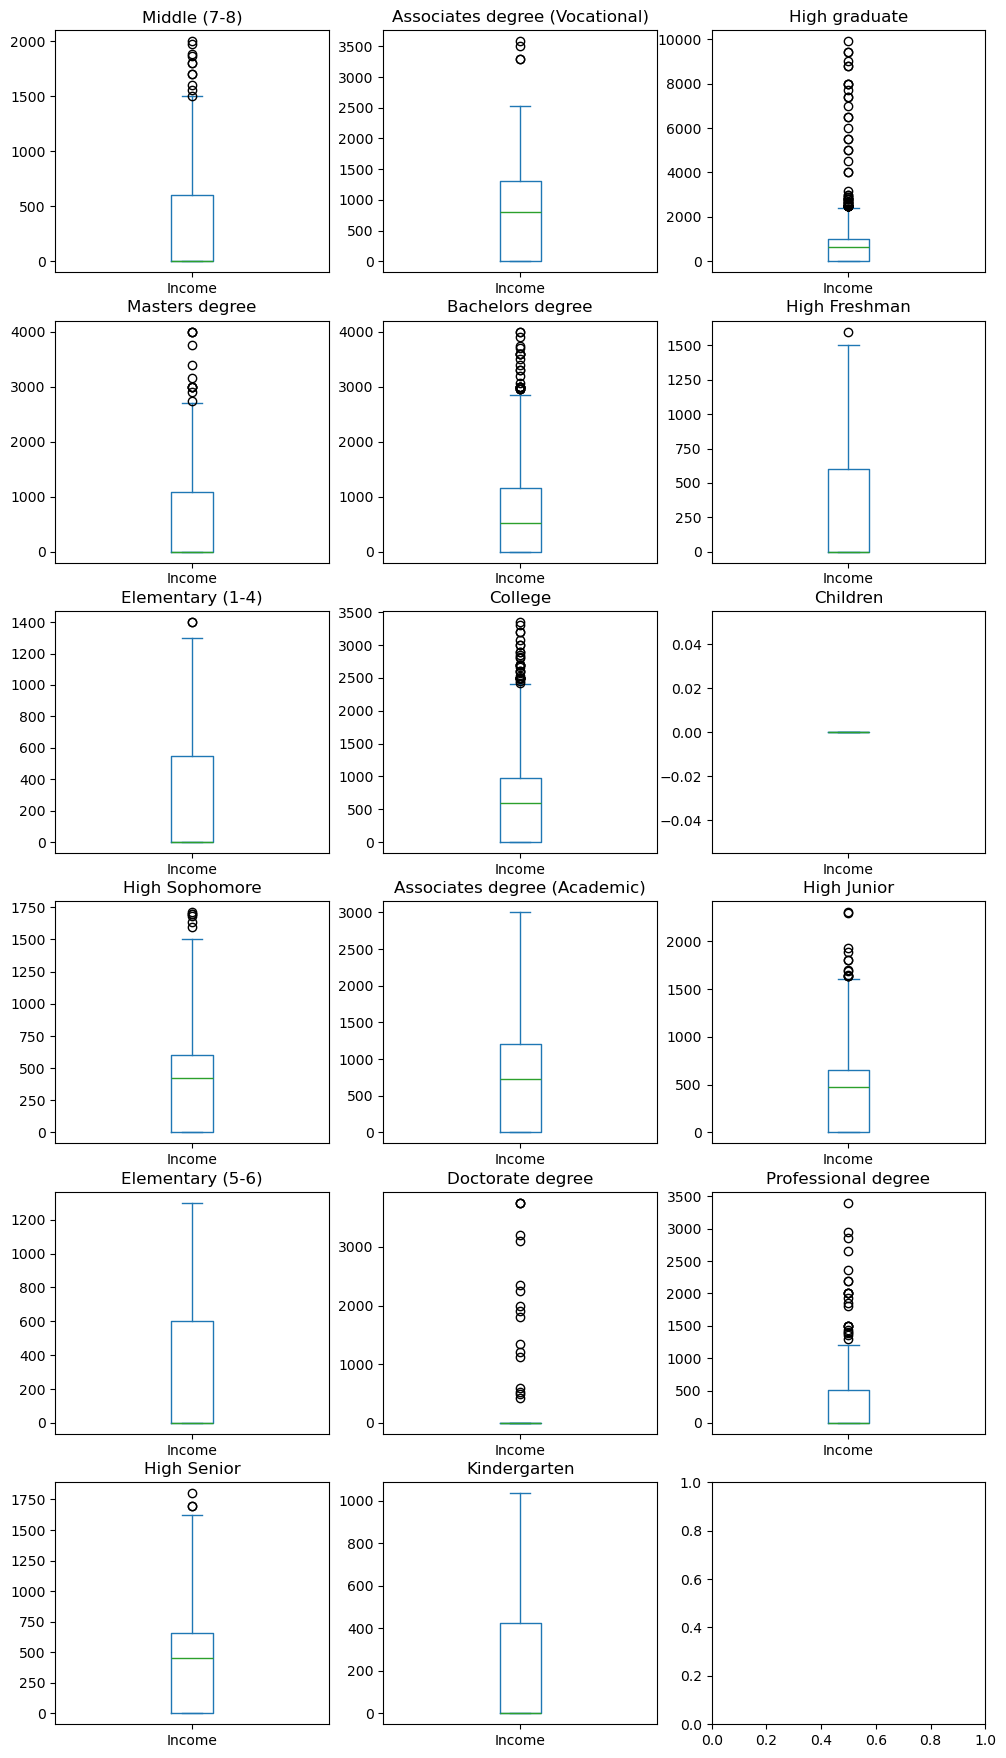

In [31]:
fig, axes = plt.subplots(6, 3, figsize=(12, 22))
axe = axes.ravel() # subplot이 2차원일 땐 axes를 unpack해줘야 함. 얘가 하나의 2차원 subplot을 만드는게 아니라 여러개의 1차원 subplot을 만들기 때문.

for i in range(len(Education_Status_list)):
    Education_Status = Education_Status_list[i]
    train_copy[train_copy['Education_Status'] == Education_Status]['Income'].plot(kind = 'box', ax = axe[i])
    axe[i].set_title(Education_Status)

박스플롯이 많이 안정되었다.

In [32]:
Education_Status_sort_list = train_copy.groupby(['Education_Status'])['Income'].mean().sort_values().index

for i in range(len(Education_Status_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Education_Status'][j] == Education_Status_sort_list[i]:
                train_copy.loc[j, 'Education_Status'] = i
    for k in range(len(test)):
        if test['Education_Status'][k] == Education_Status_sort_list[i]:
            test.loc[k, 'Education_Status'] = i

#### 추가 피쳐 생성

In [33]:
train_copy['No_Income_Level'] = train_copy['Education_Status']

In [34]:
train_copy['No_Income_Level'].replace({'Children': 0, 
                                       'Doctorate degree': 1, 
                                       'Professional degree': 1, 
                                       'Kindergarten' : 1, 
                                       'Masters degree': 2, 
                                       'Middle (7-8)': 2, 
                                       'Elementary (1-4)': 2, 
                                       'Elementary (5-6)': 2, 
                                       'High Freshman' : 2, 
                                       'Bachelors degree': 3, 
                                       'High Sophomore': 3, 
                                       'High Senior': 3, 
                                       'Associates degree (Academic)': 4, 
                                       'High Junior': 4, 
                                       'High graduate': 4, 
                                       'College': 4, 
                                       'Associates degree (Vocational)' : 4}, 
                                      inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_14476\2284508190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['No_Income_Level'].replace({'Children': 0,
C:\Users\82102\AppData\Local\Temp\ipykernel_14476\2284508190.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy['No_Incom

In [35]:
test['No_Income_Level'] = test['Education_Status']

In [36]:
test['No_Income_Level'].replace({'Children': 0, 
                                       'Doctorate degree': 1, 
                                       'Professional degree': 1, 
                                       'Kindergarten' : 1, 
                                       'Masters degree': 2, 
                                       'Middle (7-8)': 2, 
                                       'Elementary (1-4)': 2, 
                                       'Elementary (5-6)': 2, 
                                       'High Freshman' : 2, 
                                       'Bachelors degree': 3, 
                                       'High Sophomore': 3, 
                                       'High Senior': 3, 
                                       'Associates degree (Academic)': 4, 
                                       'High Junior': 4, 
                                       'High graduate': 4, 
                                       'College': 4, 
                                       'Associates degree (Vocational)' : 4}, 
                                      inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_14476\3928914651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['No_Income_Level'].replace({'Children': 0,
C:\Users\82102\AppData\Local\Temp\ipykernel_14476\3928914651.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['No_Income_Level'].re

### Employment_Status

In [37]:
train_copy.groupby(['Employment_Status'])['Income'].mean()

Employment_Status
Children or Armed Forces         474.257536
Choice Part-Time                 770.288136
Full-Time                        736.727895
Not Working                        0.000000
Part-Time (Usually Full-Time)    757.970000
Part-Time (Usually Part-Time)    807.064103
Seeking Full-Time                 94.400000
Seeking Part-Time                367.584416
Name: Income, dtype: float64

In [38]:
train_copy['Employment_Status'].replace({'Full-Time': 4, 
                                         'Children or Armed Forces': 3, 
                                         'Not Working': 0, 
                                         'Seeking Full-Time': 1, 
                                         'Choice Part-Time': 6, 
                                         'Part-Time (Usually Part-Time)': 7, 
                                         'Part-Time (Usually Full-Time)': 5, 
                                         'Seeking Part-Time': 2}, 
                                         inplace = True)
test['Employment_Status'].replace({'Full-Time': 4, 
                                         'Children or Armed Forces': 3, 
                                         'Not Working': 0, 
                                         'Seeking Full-Time': 1, 
                                         'Choice Part-Time': 6, 
                                         'Part-Time (Usually Part-Time)': 7, 
                                         'Part-Time (Usually Full-Time)': 5, 
                                         'Seeking Part-Time': 2}, 
                                         inplace = True)

C:\Users\82102\AppData\Local\Temp\ipykernel_14476\2598689630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['Employment_Status'].replace({'Full-Time': 4,
C:\Users\82102\AppData\Local\Temp\ipykernel_14476\2598689630.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy['Emplo

### Industry_Status

In [39]:
train_copy.groupby(['Industry_Status'])['Income'].mean().sort_values()

Industry_Status
Armed Forces                                       0.000000
Not in universe or children                        0.000000
Agriculture                                      391.362264
Private Household Services                       412.500000
Personal Services (except Private Household)     473.620047
Retail                                           513.466879
Social Services                                  582.238356
Education                                        583.429952
Forestry & Fisheries                             592.038462
Finance Insurance & Real Estate                  618.214876
Wholesale                                        618.806236
Business & Repair                                622.131517
Other professional services                      693.625793
Medical (except Hospitals)                       700.891148
Entertainment                                    703.643885
Manufacturing (Non-durable)                      739.130826
Construction            

In [40]:
Industry_Status_sort_list = train_copy.groupby(['Industry_Status'])['Income'].mean().sort_values().index

In [41]:
Industry_Status_sort_list

Index(['Armed Forces', 'Not in universe or children', 'Agriculture',
       'Private Household Services',
       'Personal Services (except Private Household)', 'Retail',
       'Social Services', 'Education', 'Forestry & Fisheries',
       'Finance Insurance & Real Estate', 'Wholesale', 'Business & Repair',
       'Other professional services', 'Medical (except Hospitals)',
       'Entertainment', 'Manufacturing (Non-durable)', 'Construction',
       'Manufacturing (Durable)', 'Transportation', 'Communications',
       'Public Administration', 'Mining', 'Hospitals', 'Utilities & Sanitary'],
      dtype='object', name='Industry_Status')

In [42]:
for i in range(len(Industry_Status_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Industry_Status'][j] == Industry_Status_sort_list[i]:
                train_copy.loc[j, 'Industry_Status'] = i
    for k in range(len(test)):
        if test['Industry_Status'][k] == Industry_Status_sort_list[i]:
            test.loc[k, 'Industry_Status'] = i

### Occupation_Status

In [43]:
Occupation_Status_sort_list = train_copy.groupby(['Occupation_Status'])['Income'].mean().sort_values().index

In [44]:
for i in range(len(Occupation_Status_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Occupation_Status'][j] == Occupation_Status_sort_list[i]:
                train_copy.loc[j, 'Occupation_Status'] = i
    for k in range(len(test)):
        if test['Occupation_Status'][k] == Occupation_Status_sort_list[i]:
            test.loc[k, 'Occupation_Status'] = i

### Race

In [45]:
Race_sort_list = train_copy.groupby(['Race'])['Income'].mean().sort_values().index

for i in range(len(Race_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Race'][j] == Race_sort_list[i]:
                train_copy.loc[j, 'Race'] = i
    for k in range(len(test)):
        if test['Race'][k] == Race_sort_list[i]:
            test.loc[k, 'Race'] = i

### Hispanic_Origin

In [46]:
Hispanic_Origin_sort_list = train_copy.groupby(['Hispanic_Origin'])['Income'].mean().sort_values().index

for i in range(len(Hispanic_Origin_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Hispanic_Origin'][j] == Hispanic_Origin_sort_list[i]:
                train_copy.loc[j, 'Hispanic_Origin'] = i
    for k in range(len(test)):
        if test['Hispanic_Origin'][k] == Hispanic_Origin_sort_list[i]:
            test.loc[k, 'Hispanic_Origin'] = i

### Martial_Status

In [47]:
Martial_Status_sort_list = train_copy.groupby(['Martial_Status'])['Income'].mean().sort_values().index

for i in range(len(Martial_Status_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Martial_Status'][j] == Martial_Status_sort_list[i]:
                train_copy.loc[j, 'Martial_Status'] = i
    for k in range(len(test)):
        if test['Martial_Status'][k] == Martial_Status_sort_list[i]:
            test.loc[k, 'Martial_Status'] = i

### Household_Status (분기점)

1. Household_Summary로 충분하니 Household_Status를 삭제한다.
2. 둘 다 사용한다.

일단 2로 함

여기 결측치가 있었으니 채워주고

In [48]:
test[test.Household_Status.isna()]

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,No_Income_Level
2659,20,0,12,3,0,1,1,1,8,1,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,12


In [49]:
test['Household_Status'][2659] = 'Other Relative 18+ never married Responsible Person of subfamily'

C:\Users\82102\AppData\Local\Temp\ipykernel_14476\2162220367.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Household_Status'][2659] = 'Other Relative 18+ never married Responsible Person of subfamily'
C:\Users\82102\AppData\Local

In [50]:
Household_Status_sort_list = train_copy.groupby(['Household_Status'])['Income'].mean().sort_values().index

for i in range(len(Household_Status_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Household_Status'][j] == Household_Status_sort_list[i]:
                train_copy.loc[j, 'Household_Status'] = i
    for k in range(len(test)):
        if test['Household_Status'][k] == Household_Status_sort_list[i]:
            test.loc[k, 'Household_Status'] = i

### Household_Summary

In [51]:
Household_Summary_sort_list = train_copy.groupby(['Household_Summary'])['Income'].mean().sort_values().index

for i in range(len(Household_Summary_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Household_Summary'][j] == Household_Summary_sort_list[i]:
                train_copy.loc[j, 'Household_Summary'] = i
    for k in range(len(test)):
        if test['Household_Summary'][k] == Household_Summary_sort_list[i]:
            test.loc[k, 'Household_Summary'] = i

### Citizenship

In [52]:
Citizenship_sort_list = train_copy.groupby(['Citizenship'])['Income'].mean().sort_values().index

for i in range(len(Citizenship_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Citizenship'][j] == Citizenship_sort_list[i]:
                train_copy.loc[j, 'Citizenship'] = i
    for k in range(len(test)):
        if test['Citizenship'][k] == Citizenship_sort_list[i]:
            test.loc[k, 'Citizenship'] = i

### Birth_Country, Birth_Country (Father), Birth_Country (Mother) (분기점)

1. 안쓴다
2. 쓴다

일단 2

In [53]:
Birth_Country_sort_list = train_copy.groupby(['Birth_Country'])['Income'].mean().sort_values().index

for i in tqdm(range(len(Birth_Country_sort_list))):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Birth_Country'][j] == Birth_Country_sort_list[i]:
                train_copy.loc[j, 'Birth_Country'] = i
            if train_copy['Birth_Country (Father)'][j] == Birth_Country_sort_list[i]:
                train_copy.loc[j, 'Birth_Country (Father)'] = i
            if train_copy['Birth_Country (Mother)'][j] == Birth_Country_sort_list[i]:
                train_copy.loc[j, 'Birth_Country (Mother)'] = i
    for k in range(len(test)):
        if test['Birth_Country'][k] == Birth_Country_sort_list[i]:
            test.loc[k, 'Birth_Country'] = i
        if test['Birth_Country (Father)'][k] == Birth_Country_sort_list[i]:
            test.loc[k, 'Birth_Country (Father)'] = i
        if test['Birth_Country (Mother)'][k] == Birth_Country_sort_list[i]:
            test.loc[k, 'Birth_Country (Mother)'] = i

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:40<00:00,  1.06it/s]


### Tax_Status

In [54]:
Tax_Status_sort_list = train_copy.groupby(['Tax_Status'])['Income'].mean().sort_values().index

for i in range(len(Tax_Status_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Tax_Status'][j] == Tax_Status_sort_list[i]:
                train_copy.loc[j, 'Tax_Status'] = i
    for k in range(len(test)):
        if test['Tax_Status'][k] == Tax_Status_sort_list[i]:
            test.loc[k, 'Tax_Status'] = i

### Income_Status

In [55]:
Income_Status_sort_list = train_copy.groupby(['Income_Status'])['Income'].mean().sort_values().index

for i in range(len(Income_Status_sort_list)):
    for j in range(len(train)):
        if j not in del_ind_list:
            if train_copy['Income_Status'][j] == Income_Status_sort_list[i]:
                train_copy.loc[j, 'Income_Status'] = i
    for k in range(len(test)):
        if test['Income_Status'][k] == Income_Status_sort_list[i]:
            test.loc[k, 'Income_Status'] = i

## 수치형 데이터 다루기(분기점)

1. 수치형 데이터 그대로 사용
2. 처리하고 사용

일단 1로

## 데이터 저장 건너뛰고 바로 학습으로

# 학습

In [56]:
train_copy_copy = train_copy.copy()
test_copy_copy = test.copy()

## RandomForestRegressor

In [57]:
train_x = train_copy.drop('Income', axis=1)
train_y = train_copy['Income']

In [58]:
train_x

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,No_Income_Level
0,63,1,4,4,4,6,5,4,8,4,...,3,31,31,31,0,0,0,0,1,4
1,37,1,16,4,52,14,5,4,8,3,...,3,31,31,31,3,0,0,0,0,16
2,58,0,13,4,52,15,8,1,8,4,...,3,31,31,31,5,3411,0,0,0,13
3,44,1,13,4,52,5,13,4,8,5,...,3,31,31,31,3,0,0,0,0,13
4,37,0,13,4,52,5,4,4,8,5,...,3,31,31,31,4,0,0,0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,33,1,13,3,52,17,7,4,8,1,...,3,31,31,31,3,0,0,0,0,13
19996,20,0,12,4,12,7,8,4,7,1,...,3,31,14,14,0,0,0,0,0,12
19997,22,1,12,3,52,18,13,4,8,1,...,3,31,31,31,3,0,0,0,1,12
19998,76,0,13,0,0,1,1,4,8,0,...,3,31,38,36,3,0,0,0,0,13


In [59]:
test

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,No_Income_Level
0,79,1,10,3,0,1,1,4,8,1,...,3,31,32,32,3,0,0,0,0,10
1,47,1,3,3,0,1,1,4,6,1,...,3,31,31,31,0,0,0,0,0,3
2,18,0,10,3,52,5,5,4,8,1,...,3,31,31,31,3,0,0,0,0,10
3,39,0,16,4,30,13,5,4,8,4,...,3,31,31,31,5,0,0,0,1,16
4,6,1,0,3,0,1,1,4,7,1,...,3,31,31,31,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31,1,14,3,52,12,13,4,8,1,...,3,31,31,31,3,0,0,0,0,14
9996,27,1,12,3,52,5,7,4,8,4,...,3,31,31,31,5,0,0,0,0,12
9997,18,1,13,3,7,5,5,1,8,1,...,3,31,31,31,0,0,0,0,0,13
9998,9,1,0,3,0,1,1,4,8,1,...,3,31,31,31,0,0,0,0,0,0


### 단순 학습 (569.9433244625 점)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# import pandas as pd
# import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [61]:
train_x = train_copy.drop('Income', axis=1)
train_y = train_copy['Income']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
model_RFR = RandomForestRegressor() 
model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
preds_RFR = model_RFR.predict(x_test)

print(((y_test - preds_RFR)**2).mean() ** (1/2))

547.4571812178558


In [64]:
model_RFR = RandomForestRegressor()
model_RFR.fit(train_x, train_y)
preds_RFR = model_RFR.predict(test)

In [65]:
submission = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\sample_submission.csv')
submission['Income'] = preds_RFR
submission

,ID,Income
0,TEST_0000,0.000000
1,TEST_0001,0.000000
2,TEST_0002,480.095833
3,TEST_0003,764.200000
4,TEST_0004,0.000000
...,...,...
9995,TEST_9995,1117.010000
9996,TEST_9996,662.890000
9997,TEST_9997,436.766667
9998,TEST_9998,0.000000


In [66]:
# submission.to_csv('./submission2_3.csv', index=False)

### Income에 로그스케일 적용한 후 학습(자체평가 결과 737.2583253484137점. 제출 안함)

In [67]:
train_x = train_copy.drop('Income', axis=1)
train_y = train_copy['Income']

In [68]:
train_y = np.log(train_y + 1)

In [69]:
train_y

0        6.054439
1        0.000000
2        6.758095
3        6.746412
4        6.347389
           ...   
19995    7.170888
19996    6.746412
19997    6.907755
19998    0.000000
19999    6.510258
Name: Income, Length: 19948, dtype: float64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
model_RFR = RandomForestRegressor() 
model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [71]:
preds_RFR = model_RFR.predict(x_test)

print(((np.exp(y_test) - 1 - np.exp(preds_RFR) - 1)**2).mean() ** (1/2))

737.680082230145


### 분기점 바꿔서 단순학습

#### Household_Status, Birth_Country (Father), Birth_Country (Mother) 삭제(자체평가 547.1974185977643 점, 제출안함)

In [72]:
train_x = train_copy.drop('Income', axis=1)
train_y = train_copy['Income']

In [73]:
# train_x = train_x.drop('Household_Status', axis=1)
# test = test.drop('Household_Status', axis=1)

In [74]:
# train_x = train_x.drop('Birth_Country (Father)', axis=1)
# test = test.drop('Birth_Country (Father)', axis=1)

In [75]:
# train_x = train_x.drop('Birth_Country (Mother)', axis=1)
# test = test.drop('Birth_Country (Mother)', axis=1)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
model_RFR = RandomForestRegressor() 
model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [77]:
preds_RFR = model_RFR.predict(x_test)

print(((y_test - preds_RFR)**2).mean() ** (1/2))

549.7683845032366


#### Household_Status, Birth_Country, Birth_Country (Father), Birth_Country (Mother) 삭제 (자체평가 549.4547746775175점, 제출안함)

In [78]:
train_x = train_copy.drop('Income', axis=1)
train_y = train_copy['Income']

In [79]:
# train_x = train_x.drop('Birth_Country', axis=1)
# test = test.drop('Birth_Country', axis=1)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
model_RFR = RandomForestRegressor() 
model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [81]:
preds_RFR = model_RFR.predict(x_test)

print(((y_test - preds_RFR)**2).mean() ** (1/2))

548.467641039735


### 수치형 데이터 처리해주고 학습하기(자체평가 결과 554.2544596549571점. 제출 안함)

In [82]:
train_copy_numerical = train[train.describe().columns]

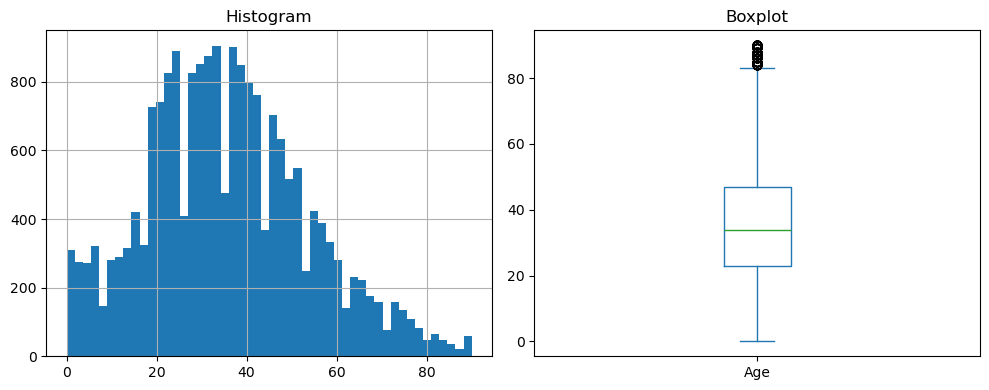

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Age'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Age'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

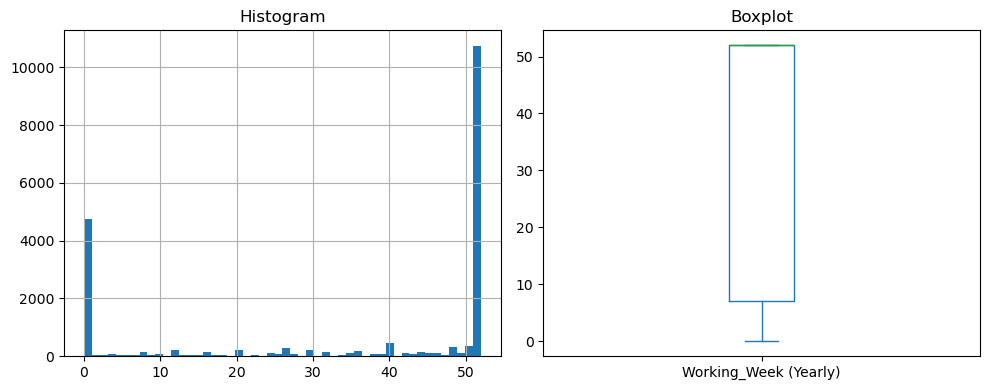

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Working_Week (Yearly)'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Working_Week (Yearly)'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

27 이하는 0, 초과는 52로 범주화해보자

In [85]:
for i in range(len(train)):
    if i not in del_ind_list:
        if train_copy.loc[i, 'Working_Week (Yearly)'] > 27:
            train_copy.loc[i, 'Working_Week (Yearly)'] = 1
        else:
            train_copy.loc[i, 'Working_Week (Yearly)'] = 0

In [86]:
for i in range(len(test)):
    if test.loc[i, 'Working_Week (Yearly)'] > 27:
        test.loc[i, 'Working_Week (Yearly)'] = 1
    else:
        test.loc[i, 'Working_Week (Yearly)'] = 0

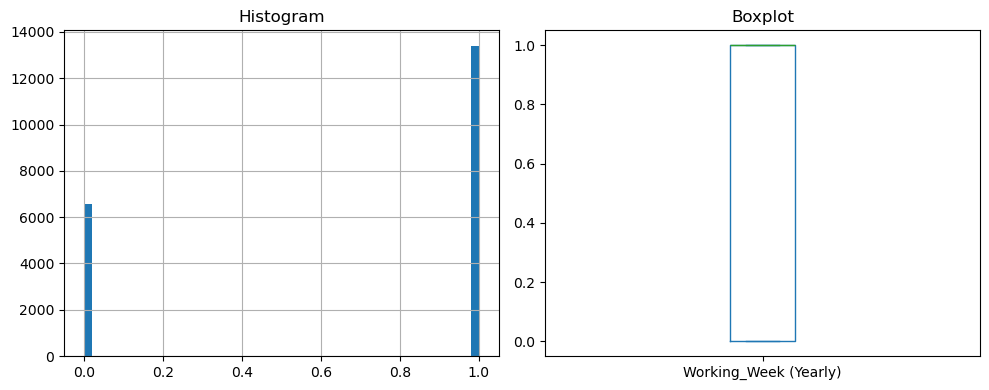

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy['Working_Week (Yearly)'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy['Working_Week (Yearly)'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

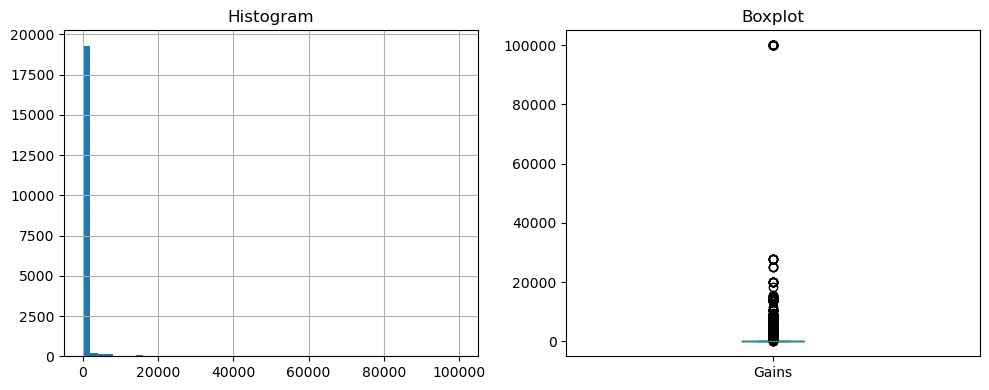

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

In [94]:
# train_copy = train_copy.drop('Gains', axis=1)
test = test.drop('Gains', axis=1)

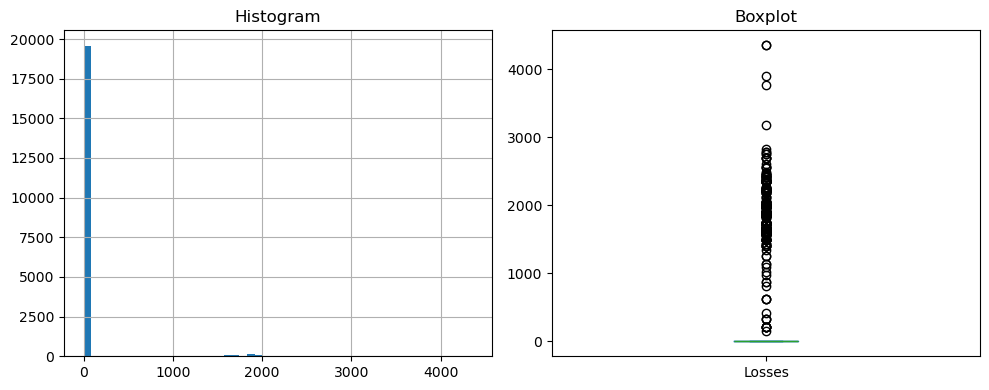

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

In [95]:
# train_copy = train_copy.drop('Losses', axis=1)
# test = test.drop('Losses', axis=1)

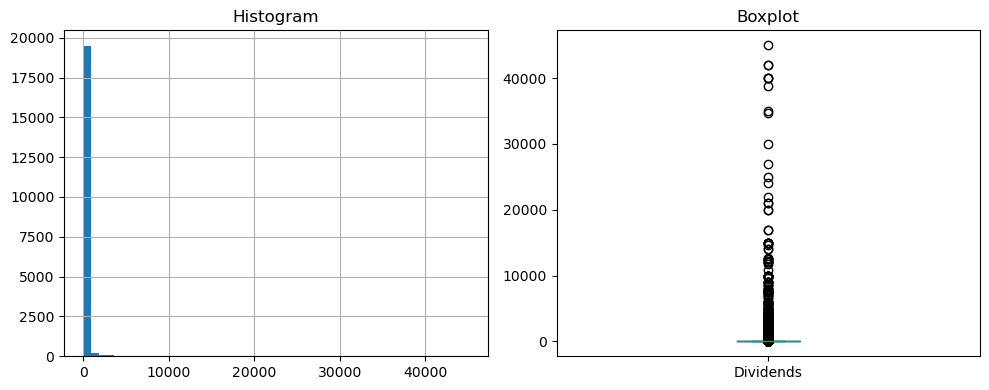

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Dividends'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Dividends'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

In [97]:
for i in range(len(train)):
    if i not in del_ind_list:
        if train_copy.loc[i, 'Dividends'] > 30000:
            train_copy.loc[i, 'Dividends'] = 1
        else:
            train_copy.loc[i, 'Dividends'] = 0

In [98]:
for i in range(len(test)):
    if test.loc[i, 'Dividends'] > 30000:
        test.loc[i, 'Dividends'] = 1
    else:
        test.loc[i, 'Dividends'] = 0

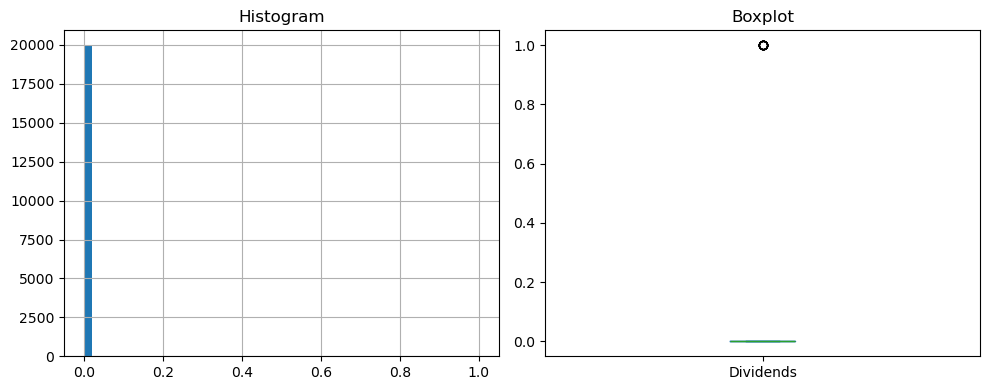

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy['Dividends'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy['Dividends'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

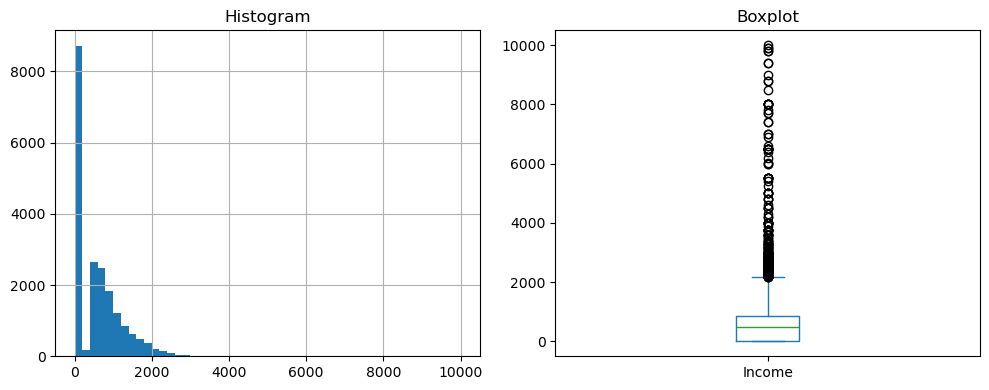

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Income'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Income'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

In [101]:
train_x = train_copy.drop('Income', axis=1)
train_y = train_copy['Income']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
model_RFR = RandomForestRegressor() 
model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [103]:
preds_RFR = model_RFR.predict(x_test)

print(((y_test - preds_RFR)**2).mean() ** (1/2))

554.1175900437573


### 베이지안 최적화로 하이퍼파라미터 튜닝

In [113]:
train_x = train_copy.drop('Income', axis=1)
train_y = train_copy['Income']

In [125]:
from sklearn.metrics import roc_auc_score

def eval_function(n_estimators, criterion, bootstrap):
    rf_bounds = {'n_estimators': [10, 30, 50, 100],
                      'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
                      'bootstrap': [True, False]}
    rf=RandomForestClassifier(**rf_bounds)
    X_train,X_valid,y_train,y_valid=train_test_split(train_x,train_y,test_size=0.2)
    rf.fit(X_train,y_train)
    preds = rf.predict(X_valid)
    score = roc_auc_score(y_valid, preds)

    return score

In [126]:
param_bounds = {'n_estimators': [10, 30, 50, 100],
                      'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
                      'bootstrap': [True, False]}

In [129]:
# from bayes_opt import BayesianOptimization

# optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=42, verbose=1)
# optimizer.maximize(init_points=5, n_iter=10)

# 오류 발생

### 그리드 서치로 하이퍼파라미터 튜닝(593.0957975322 점)

In [130]:
train_x = train_copy.drop('Income', axis=1)
train_y = train_copy['Income']

In [131]:
param_bounds = {'n_estimators': [10, 30, 50, 100],
                      'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
                      'bootstrap': [True, False]}

In [140]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
model_RFR = RandomForestRegressor() 
model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [134]:
rf = RandomForestRegressor(random_state=42)

In [135]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_bounds, cv=3, n_jobs=-1, verbose=1, scoring='roc_auc')

In [136]:
grid_search.fit(train_x, train_y)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\82102\anaconda3\envs\MLpy310\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='roc_auc', verbose=1)

In [137]:
# 최적의 파라미터와 최고 점수 출력
best_params_Grd = grid_search.best_params_
best_score_Grd = grid_search.best_score_

In [138]:
best_params_Grd, best_score_Grd

({'bootstrap': True, 'criterion': 'squared_error', 'n_estimators': 10}, nan)

In [139]:
preds_RFR_GS = grid_search.predict(test)

In [142]:
submission = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\sample_submission.csv')
submission['Income'] = preds_RFR_GS
submission

,ID,Income
0,TEST_0000,0.000000
1,TEST_0001,0.000000
2,TEST_0002,224.125000
3,TEST_0003,605.714286
4,TEST_0004,0.000000
...,...,...
9995,TEST_9995,1489.400000
9996,TEST_9996,679.200000
9997,TEST_9997,350.000000
9998,TEST_9998,0.000000


In [143]:
submission.to_csv('./submission2_7.csv', index=False)